In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [0]:
y_train.shape

(60000,)

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimnensions of the images are not 28 * 28"
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_test.shape[1:] == (28,28)), "The dimnensions of the images are not 28 * 28"

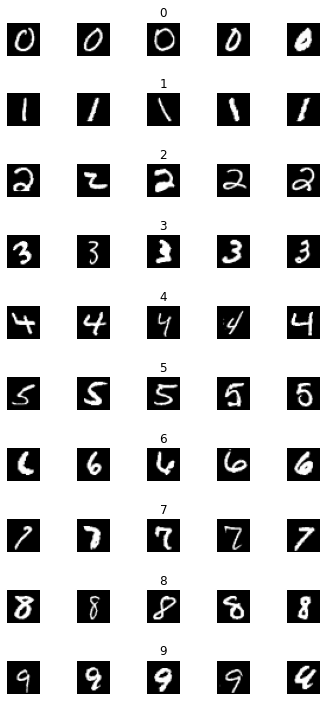

In [0]:
num_of_samples = []
cols=5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes , ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap = 'gray')
        axs[j][i].axis("off")
        if i ==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


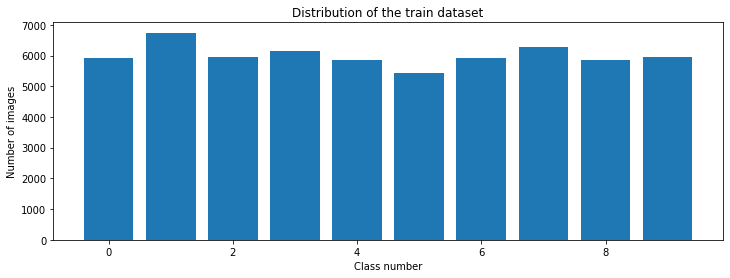

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
y_train.shape

(60000, 10)

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
#define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu')) #30개 filter 5*5크기 padding을 이용해 이미지의 크기가 작아주는 것을 방지(padding사용 안함 이미지가 주로 중앙에있어서 경계선 값 사오간 없음) #strides 몇칸 filter를 이동시킬건지
  model.add(MaxPooling2D(pool_size=(2, 2))) # imagesize is be half
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #FullyConnect
  model.add(Flatten()) #(5,5,15) shape을 하나의 벡터값으로 만들어줘야 fully connect가 가능하다.
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  #outputlayer
  model.add(Dense(num_classes,activation='softmax'))
  #lr = learning rate
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model
  

In [0]:
model = leNet_model()

In [0]:
model.fit(X_train,y_train,
          batch_size=512,
          epochs=10,
          validation_split=0.1,
          verbose=1,
          shuffle=1
          )

Epoch 1/10
106/106 [==============================] - 1s 8ms/step - loss: 0.2564 - accuracy: 0.9194 - val_loss: 0.0644 - val_accuracy: 0.9823
Epoch 2/10
106/106 [==============================] - 1s 7ms/step - loss: 0.0719 - accuracy: 0.9773 - val_loss: 0.0454 - val_accuracy: 0.9863
Epoch 3/10
106/106 [==============================] - 1s 7ms/step - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0563 - val_accuracy: 0.9850
Epoch 4/10
106/106 [==============================] - 1s 7ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0399 - val_accuracy: 0.9878
Epoch 5/10
106/106 [==============================] - 1s 7ms/step - loss: 0.0434 - accuracy: 0.9856 - val_loss: 0.0389 - val_accuracy: 0.9897
Epoch 6/10
106/106 [==============================] - 1s 7ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0501 - val_accuracy: 0.9875
Epoch 7/10
106/106 [==============================] - 1s 7ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0431 - val_accuracy: 0.9902
Epoch 

In [0]:
import pandas as pd

In [0]:
history = pd.DataFrame(model.history.history)

In [0]:
history.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

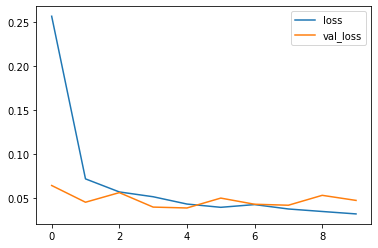

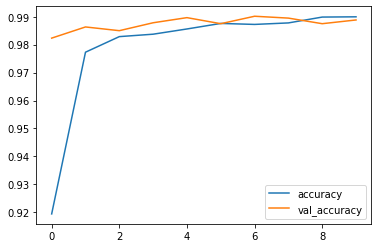

In [0]:
history[['loss','val_loss']].plot()
history[['accuracy','val_accuracy']].plot()

In [0]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)

In [0]:
image = Image.open(response.raw)

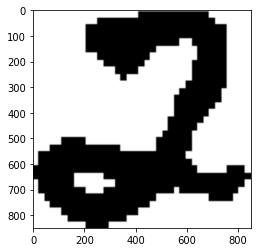

In [0]:
plt.imshow(image)

In [0]:
import cv2

In [0]:
image_array = np.asarray(image)

In [0]:
resized = cv2.resize(image_array,(28,28))

In [0]:
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

In [0]:
image = cv2.bitwise_not(gray_scale)

In [0]:
image = image/255

In [0]:
image = image.reshape(1,28,28,1)

In [0]:
prediction = model.predict_classes(image)

In [0]:
print(prediction)

[2]


In [0]:
score = model.evaluate(X_test,y_test,verbose=0)

In [0]:
print("loss: ", score[0])
print("acc: ", score[1])

loss:  0.033428579568862915
acc:  0.9900000095367432
